# **Aplicação 1: Teste de Colesterol dos Colaboradores**
Teste de Colesterol dos Colaboradores
Uma empresa quer verificar como está o nível de colesterol de seus colaboradores para um novo programa da área de Saúde. Para isso, coletou amostras de sangue de 220 funcionários selecionados aleatoriamente, esse levantamento está no arquivo colesterol.xlsx (disponível em Materiais Complementares). Sabendo que é considerado aceitável um nível de colesterol de até 190mg/dL.

Objetivo da empresa: Melhoria da qualidade de vida dos funcionários.

Criar KPIs de saúde e ações e projetos.

a) Construa o histograma e avalie se a distribuição do colesterol dos colaboradores se aproxima da Normal.

b) Realize um Teste de Hipóteses para comparar se a média do colesterol está aceitável ou não.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
file_path = '/content/colesterol.xlsx'
df= pd.read_excel(file_path)
df.head()

,Colesterol (mg/dL)
0,180.776511
1,176.468838
2,203.572625
3,205.731732
4,162.098667


In [ ]:
df.columns = ["colesterol"]

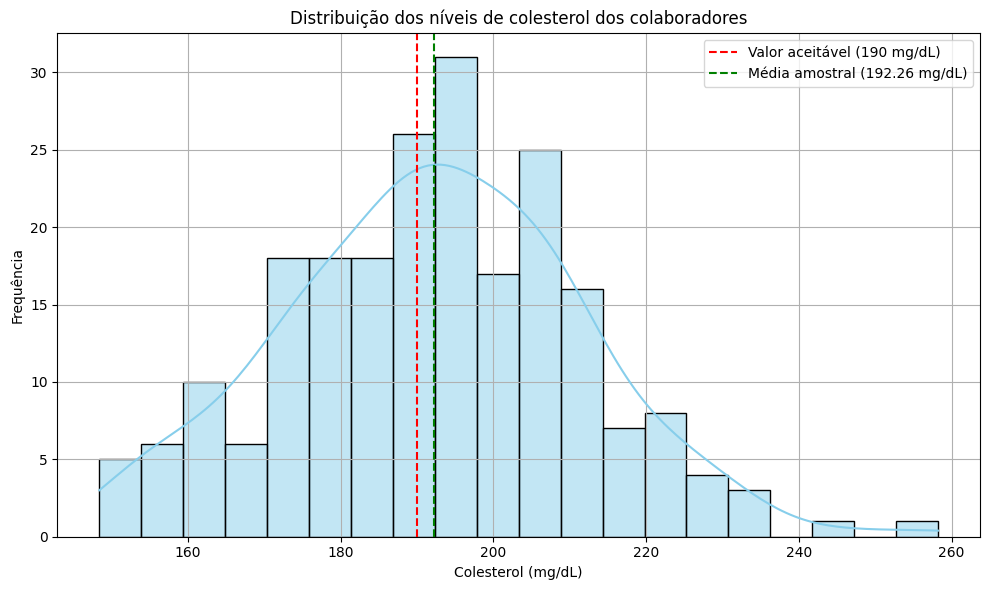

In [ ]:
# média
media_real = df["colesterol"].mean()
media_fmt = round(float(media_real), 2)

# gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df["colesterol"], bins=20, kde=True, color="skyblue", edgecolor="black")
plt.axvline(190, color="red", linestyle="--", label="Valor aceitável (190 mg/dL)")
plt.axvline(media_real, color="green", linestyle="--", label=f"Média amostral ({media_fmt} mg/dL)")

plt.title("Distribuição dos níveis de colesterol dos colaboradores")
plt.xlabel("Colesterol (mg/dL)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


a) Análise da Distribuição :
O histograma mostra uma distribuição aproximadamente simétrica, com formato parecido ao de uma distribuição normal.

Para confirmar, fizemos o Teste de Shapiro-Wilk:

Estatística: 0.994

Valor-p: 0.478

Como o valor-p é maior que 0.05, não rejeitamos a hipótese nula de normalidade. Ou seja, os dados podem ser considerados normalmente distribuídos.

b) Teste de Hipóteses
Agora vamos realizar um teste t para verificar se a média do colesterol dos colaboradores é menor ou igual a 190 mg/dL (valor aceitável).
A hipótese será:

H₀ (nula): μ ≤ 190 (colesterol médio aceitável)

H₁ (alternativa): μ > 190 (colesterol médio elevado)

Vamos calcular agora.

In [ ]:
# Teste t unilateral (média > 190)
# H0: média <= 190
# H1: média > 190

media_aceitavel = 190
t_statistic, p_value = stats.ttest_1samp(df["colesterol"], popmean=media_aceitavel)

# Como é um teste unilateral à direita, dividimos o p-valor por 2
p_value_unilateral = p_value / 2

# Verificar se a média é de fato maior que 190 antes de interpretar o p-valor
media_real = df["colesterol"].mean()


t_statistic = round(float(t_statistic), 2)
p_value = round(float(p_value_unilateral), 3)
media = round(float(media_real), 2)

t_statistic, p_value, media



(1.73, 0.043, 192.26)


#### Hipóteses:
- **H₀ (Hipótese nula):** μ ≤ 190 → o colesterol médio está dentro do aceitável.
- **H₁ (Hipótese alternativa):** μ > 190 → o colesterol médio está acima do aceitável.

Foi realizado um **teste t de uma amostra**, e como se trata de um teste **unilateral à direita**, o p-valor foi dividido por 2.

---

### Conclusão:

A média de colesterol observada na amostra foi de **192,26 mg/dL**, um pouco acima do valor de referência de **190 mg/dL**.

O teste t resultou em:

- Estatística t = **1,73**  
- Valor-p unilateral = **0,043**

Como **p < 0,05**, **rejeitamos a hipótese nula**.

 **Conclusão final:** há evidência estatística de que o colesterol médio dos colaboradores **está acima do limite considerado aceitável**.
